## Fraude de cartão de crédito

### Fonte de Dados:

- Os pagamentos digitais estão evoluindo, mas os criminosos cibernéticos também.

- De acordo com o Data Breach Index, mais de 5 milhões de registros são roubados diariamente, uma estatística preocupante que mostra - a fraude ainda é muito comum tanto para pagamentos do tipo Cartão-Presente quanto Cartão-Não Presente.

- No mundo digital de hoje, onde trilhões de transações com cartões acontecem por dia, a detecção de fraudes é um desafio.


### Explicação do das variáveis:

* **distancefromhome** - a distância de casa onde a transação aconteceu.

* **distancefromlast_transaction** - a distância da última transação aconteceu.

* **ratiotomedianpurchaseprice** - Razão da transação do preço de compra para o preço de compra mediano.

* **repeat_retailer** - É a transação que aconteceu do mesmo varejista.

* **used_chip** - É a transação através de chip (cartão de crédito).

* **usedpinnumber** - A transação aconteceu usando o número PIN.

* **online_order** - A transação é um pedido online.

* **fraude** - A transação é fraudulenta.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
dados = pd.read_csv('card_transdata.csv')
dados.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [28]:
dados.shape

(1000000, 8)

In [29]:
dados.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

EDA

In [30]:
dados.describe().round(2)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.0,1000000.00,1000000.00
mean,26.63,5.04,1.82,0.88,0.35,0.1,0.65,0.09
std,65.39,25.84,2.80,0.32,0.48,0.3,0.48,0.28
min,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
25%,3.88,0.30,0.48,1.00,0.00,0.0,0.00,0.00
50%,9.97,1.00,1.00,1.00,0.00,0.0,1.00,0.00
75%,25.74,3.36,2.10,1.00,1.00,0.0,1.00,0.00
max,10632.72,11851.10,267.80,1.00,1.00,1.0,1.00,1.00


In [31]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [32]:
#Quantidade de operações fraudulentas(1) e não fraudulentas(0):
dados['fraud'].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

In [33]:
Total = len(dados)
Fraudes = len(dados[dados['fraud'] == 1.0].value_counts())
Nao_Fraude = len(dados[dados['fraud'] == 0].value_counts())

percentual_fraudes = Fraudes/Total * 100

print("Total de dados: ", Total)
print("Total de não fraudes: ", Nao_Fraude)
print("Total de fraudes: ", Fraudes)
print("Percentual de fraudes na base: ", (round(percentual_fraudes, 2)), "%")

Total de dados:  1000000
Total de não fraudes:  912597
Total de fraudes:  87403
Percentual de fraudes na base:  8.74 %


([<matplotlib.patches.Wedge at 0x21915d17a50>,
 [Text(-1.058791753125598, 0.2982616695340232, 'Non-Fraud'),
  Text(1.155045499733811, -0.3253765411714109, 'Fraud')],
 [Text(-0.5775227744321443, 0.16268818338219448, '91%'),
  Text(0.6737765415113897, -0.18980298234998966, '9%')])

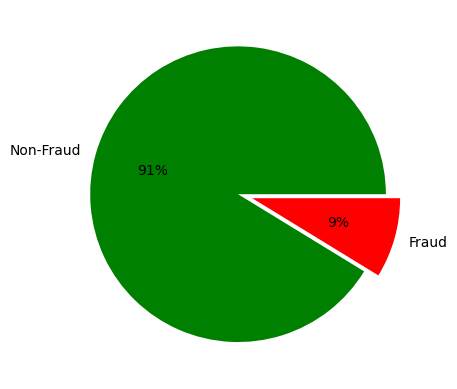

In [34]:
categororias = ["Non-Fraud", "Fraud"]
plt.pie(dados['fraud'].value_counts(), labels=categororias, autopct = "%.0f%%", explode= (0, 0.1), colors = ("g", "r"))

In [35]:
dados_fraudes = dados[dados['fraud'] == 1]
dados_fraudes.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0


In [36]:
dados_fraudes.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.0
mean,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318,1.0
std,134.391608,47.997697,5.564320,0.324825,0.436647,0.055801,0.225391,0.0
min,0.025847,0.000407,0.011966,0.000000,0.000000,0.000000,0.000000,1.0
25%,4.585729,0.328199,3.500270,1.000000,0.000000,0.000000,1.000000,1.0
50%,15.454219,1.157631,5.071294,1.000000,0.000000,0.000000,1.000000,1.0
75%,101.110104,4.598504,7.331222,1.000000,1.000000,0.000000,1.000000,1.0
max,10632.723672,2160.499922,266.689692,1.000000,1.000000,1.000000,1.000000,1.0


C:\Users\luish\AppData\Local\Temp\ipykernel_13004\1948042303.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados_fraudes, x = 'repeat_retailer', palette= 'Paired') #Aconteceu no mesmo varejista?
C:\Users\luish\AppData\Local\Temp\ipykernel_13004\1948042303.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = dados_fraudes, x = 'used_chip', palette= 'Paired') #Uso de cartão de crédito?
C:\Users\luish\AppData\Local\Temp\ipykernel_13004\1948042303.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = dados_fraudes, x

<Axes: xlabel='online_order', ylabel='count'>

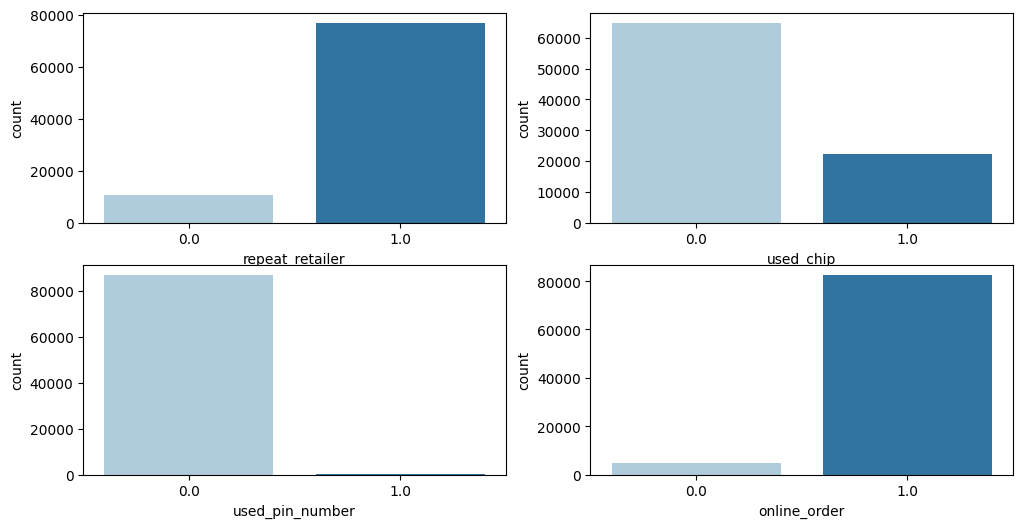

In [37]:
#utilizando gráficos para observar as distribuições de frequência das nossas variáveis categóricas.

plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
sns.countplot(data=dados_fraudes, x = 'repeat_retailer', palette= 'Paired') #Aconteceu no mesmo varejista?

plt.subplot(2,2,2)
sns.countplot(data = dados_fraudes, x = 'used_chip', palette= 'Paired') #Uso de cartão de crédito?

plt.subplot(2,2,3)
sns.countplot(data = dados_fraudes, x = 'used_pin_number', palette= 'Paired') #Utilizou o mesmo número de PIN?

plt.subplot(2,2,4)
sns.countplot(data = dados_fraudes, x = 'online_order', palette= 'Paired') #Foi em uma compra online?

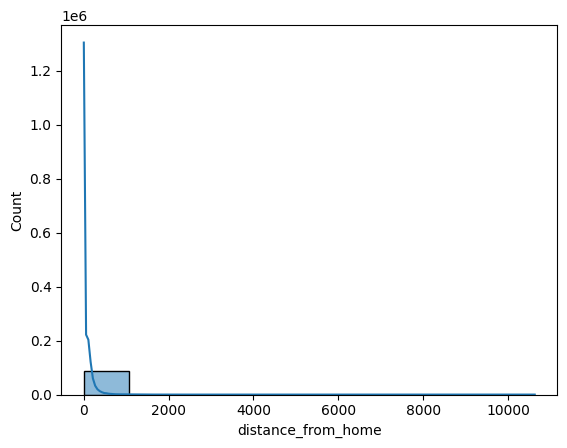

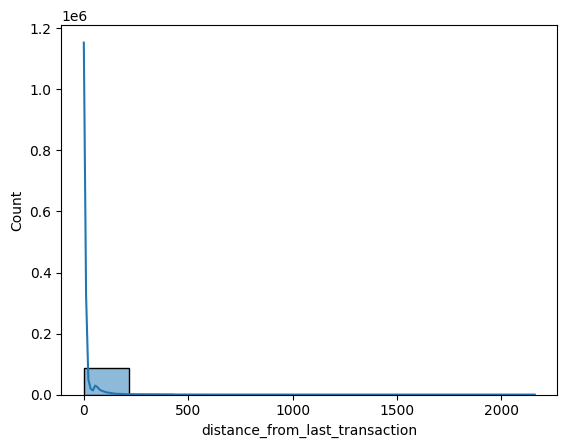

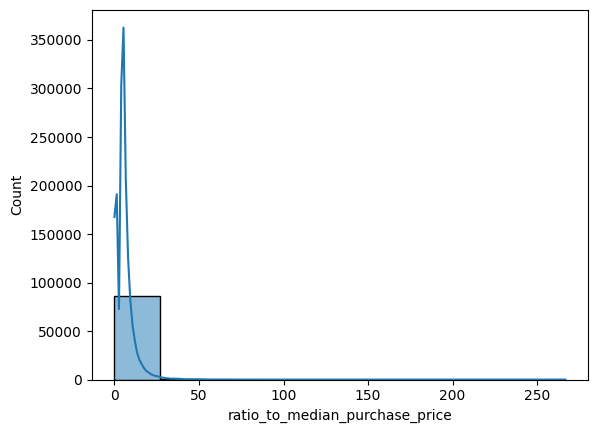

In [38]:
Colunas_Numericas = ["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]
for column in Colunas_Numericas:
    plt.figure()
    plot = dados_fraudes[column]
    sns.histplot(plot, bins=10, kde=True)
    plt.show()

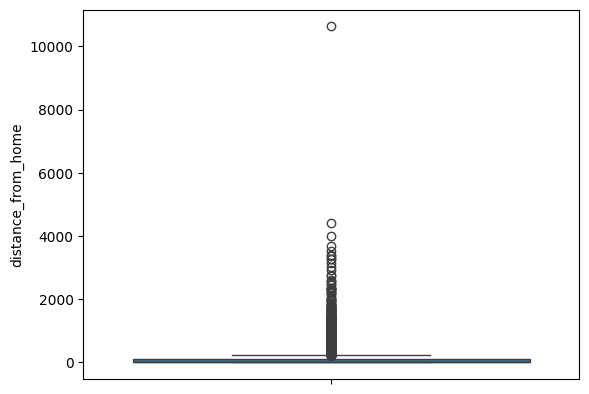

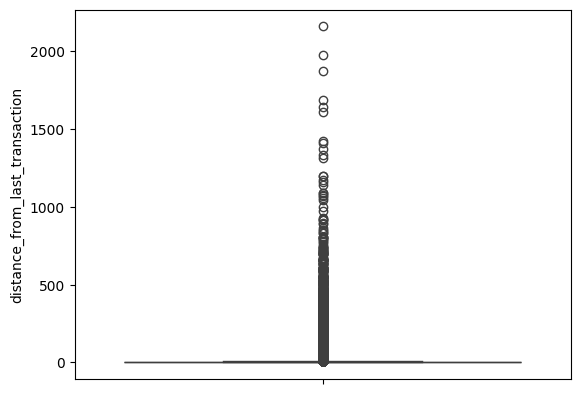

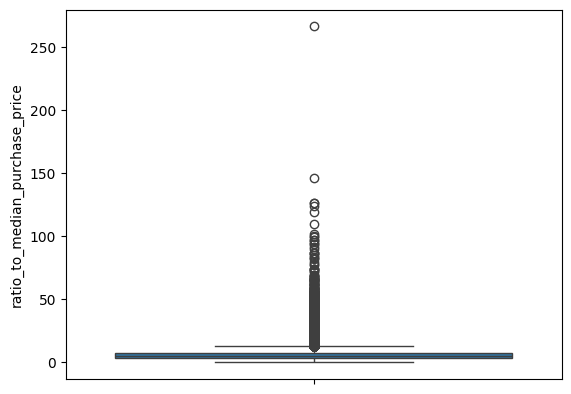

In [39]:
Colunas_Numericas = ["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]
for column in Colunas_Numericas:
    plt.figure()
    plot = dados_fraudes[column]
    sns.boxplot(plot)
    plt.show()

In [40]:
#Visualização está ruim. 
#Fazendo uma transformação logarítma para melhorar a visualização

for column in [0,1,2]:
    dados_fraudes.iloc[:, column] = np.log10(dados_fraudes.iloc[:, column])

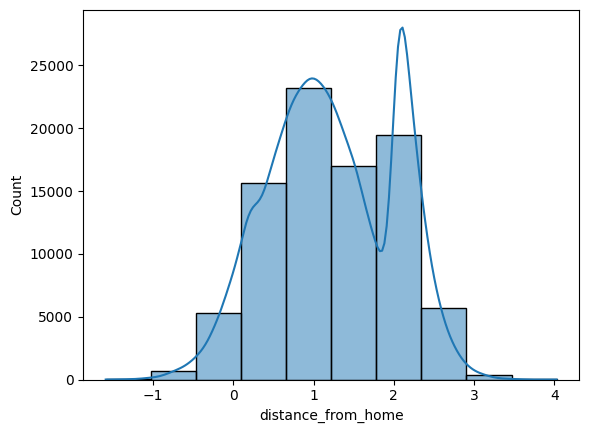

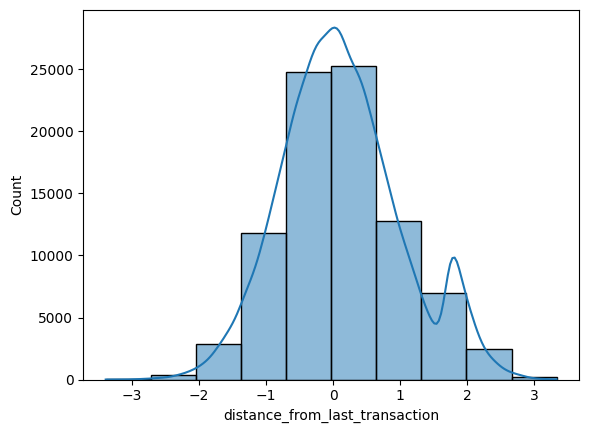

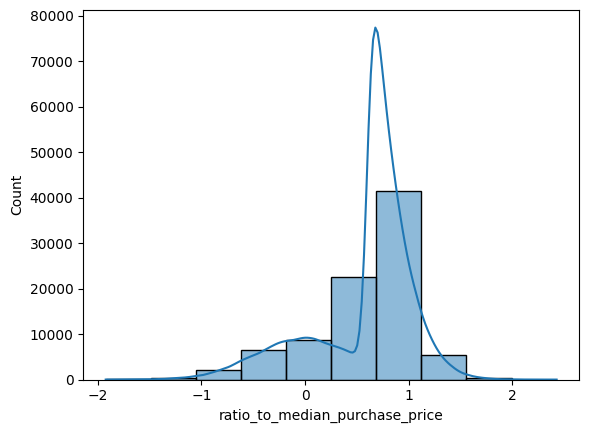

In [41]:
Colunas_Numericas = ["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]
for column in Colunas_Numericas:
    plt.figure()
    plot = dados_fraudes[column]
    sns.histplot(plot, bins=10, kde=True)
    plt.show()

<Axes: >

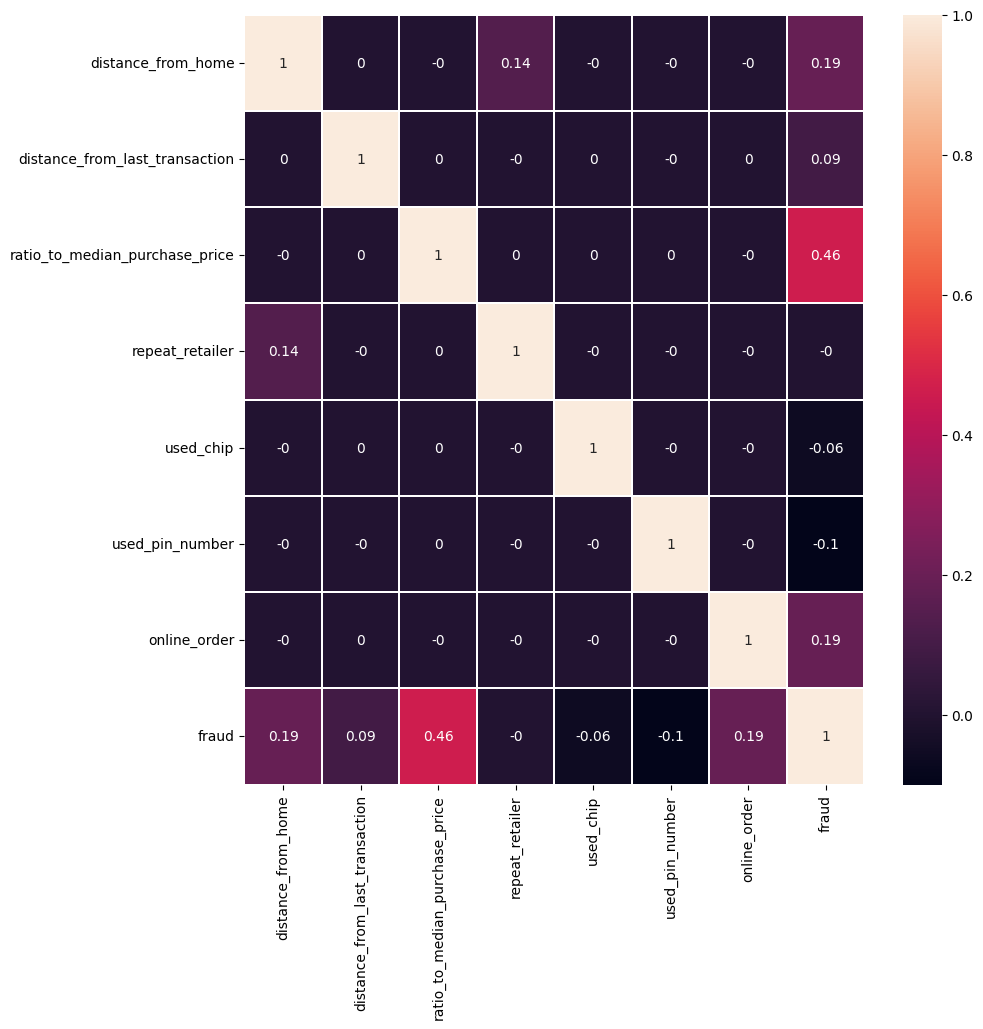

In [44]:
matriz_correlacao = dados.corr().round(2)

fig, ax = plt.subplots(figsize = (10,10))

sns.heatmap(data = matriz_correlacao, ax = ax, annot= True, linewidths= 0.3)

Criando o modelo de Machine Learning

In [45]:
from sklearn.model_selection import train_test_split

y = dados['fraud']
X = dados[['distance_from_home','ratio_to_median_purchase_price', 'online_order']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,
                                                    random_state=7) #20% para teste e 80% de treino

# Comparando os dados originais com os dados transformados por normalização e padronização.

Na padronização, a média será zerada e o desvio padrão ajustado para 1, o que reduz a amplitude dos desvios-padrão. Essa transformação pode ser realizada com o uso do StandardScaler.

Na normalização, os valores serão ajustados para ficarem entre 0 e 1, utilizando o MinMaxScaler.

A análise das plotagens antes e depois das transformações permitirá verificar se há mudanças significativas na distribuição dos dados.

Com base nessas comparações, será escolhido o tipo de escalonamento que melhor se adequa às variáveis. Caso a transformação altere de forma significativa o padrão visual dos dados, ela poderá ser considerada inadequada por descaracterizar a informação original.

In [46]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()

X_train_escalonado = scaler.fit_transform(X_train)
X_test_escalonado = scaler.transform(X_test)

Vamos usar o modelo KNN serve para detectar fraudes porque ele classifica uma transação com base na similaridade com outras já conhecidas, identificando padrões de comportamento suspeito comparando com os vizinhos mais próximos.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
error = []
for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_escalonado,y_train)
    y_predict = knn.predict(X_test_escalonado)
    error.append(np.mean(y_predict != y_test))

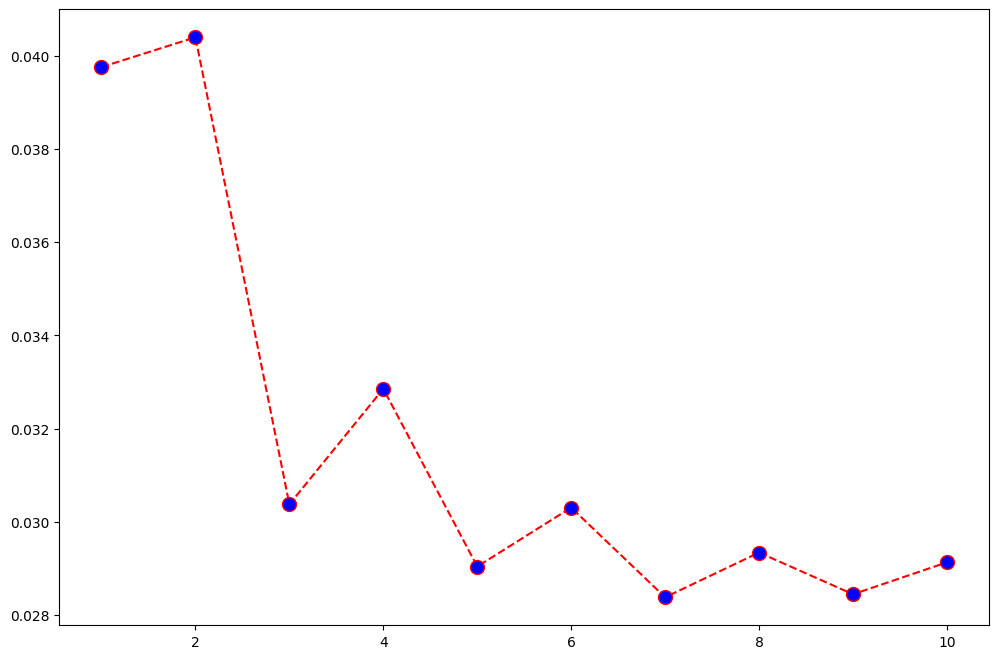

In [49]:
plt.figure(figsize=(12,8))

plt.plot(range(1,11), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)

In [50]:
modelo_classificador = KNeighborsClassifier(n_neighbors=7)
modelo_classificador.fit(X_train_escalonado, y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [53]:
from sklearn.metrics import accuracy_score

In [54]:
y_predict = modelo_classificador.predict(X_test_escalonado)
print(accuracy_score(y_test, y_predict))

0.97162


Comparando os modelos sem escalonamento

In [55]:
print('Training set score: {:.4f}'.format(modelo_classificador.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(modelo_classificador.score(X_test, y_test)))

C:\Users\luish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Training set score: 0.7494


C:\Users\luish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Test set score: 0.7513


In [56]:
print('Training set score: {:.4f}'.format(modelo_classificador.score(X_train_escalonado, y_train)))
print('Test set score: {:.4f}'.format(modelo_classificador.score(X_test_escalonado, y_test)))

Training set score: 0.9764
Test set score: 0.9716
